In [15]:
!pip install numpy pandas matplotlib seaborn scikit-learn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# For prediction models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
# Step 2: Generate Synthetic Dataset

import pandas as pd
import numpy as np

# Reproducibility
np.random.seed(42)

# Create date range
dates = pd.date_range(start="2024-01-01", end="2024-12-31", freq="D")

# Define zones
zones = ["Zone1", "Zone2", "Zone3"]

# Empty DataFrame
data = []

for zone in zones:
    for date in dates:
        avg_temp = np.random.normal(loc=30, scale=5)   # Around 30°C
        humidity = np.random.randint(40, 90)           # %
        special_event = np.random.choice([0, 1], p=[0.9, 0.1])  # 10% chance of event
        energy = 500 + (avg_temp * 10) - (humidity * 2) + (special_event * 200) + np.random.normal(0, 30)

        data.append([date, zone, avg_temp, humidity, special_event, energy])

# Create DataFrame
df = pd.DataFrame(data, columns=["Date", "ZoneID", "AvgTemperature", "Humidity", "SpecialEvent", "EnergyConsumption"])

# Save dataset
df.to_csv("city_energy_2024.csv", index=False)

#✅ Show first 10 rows (so output appears)
df.head(10)


,Date,ZoneID,AvgTemperature,Humidity,SpecialEvent,EnergyConsumption
0,2024-01-01,Zone1,32.483571,82,0,656.687779
1,2024-01-02,Zone1,24.010968,62,0,680.359432
2,2024-01-03,Zone1,31.395206,63,0,718.267523
3,2024-01-04,Zone1,30.399159,69,0,661.206096
4,2024-01-05,Zone1,27.682912,51,0,660.857223
5,2024-01-06,Zone1,17.804471,67,1,762.147946
6,2024-01-07,Zone1,28.744780,83,0,616.531788
7,2024-01-08,Zone1,27.278086,46,0,684.108541
8,2024-01-09,Zone1,26.996807,59,0,643.217253
9,2024-01-10,Zone1,34.744214,47,0,800.867660


In [17]:
# Load data again just to be sure
df = pd.read_csv("city_energy_2024.csv")

# Check for missing values
print(df.isnull().sum())

# Drop missing values if any
df = df.dropna()

# Remove duplicates if any
df = df.drop_duplicates()

# Reset index after cleaning
df.reset_index(drop=True, inplace=True)

# Confirm cleaning done
print("Data after cleaning:", df.shape)
df.head()


Date                 0
ZoneID               0
AvgTemperature       0
Humidity             0
SpecialEvent         0
EnergyConsumption    0
dtype: int64
Data after cleaning: (1098, 6)


,Date,ZoneID,AvgTemperature,Humidity,SpecialEvent,EnergyConsumption
0,2024-01-01,Zone1,32.483571,82,0,656.687779
1,2024-01-02,Zone1,24.010968,62,0,680.359432
2,2024-01-03,Zone1,31.395206,63,0,718.267523
3,2024-01-04,Zone1,30.399159,69,0,661.206096
4,2024-01-05,Zone1,27.682912,51,0,660.857223


In [24]:
import pandas as pd
import numpy as np

# Generate synthetic dataset
np.random.seed(42)
n_samples = 500

# Generate features
temperature = np.random.randint(15, 45, n_samples)  # temperature between 15°C–45°C
zones = np.random.choice(['Residential', 'Commercial', 'Industrial'], n_samples)
days = np.random.choice(['Weekday', 'Weekend'], n_samples)
months = np.random.choice(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], n_samples)

# Energy consumption depends on temperature, zone, and day
energy_consumption = (
    temperature * np.random.uniform(8, 12, n_samples)
    + np.where(zones == 'Industrial', 1000, np.where(zones == 'Commercial', 500, 200))
    + np.where(days == 'Weekend', -200, 0)
    + np.random.normal(0, 100, n_samples)  # noise
)

# Create dataframe
df = pd.DataFrame({
    'Temperature': temperature,
    'Zone': zones,
    'Day': days,
    'Month': months,   # ✅ Added Month column
    'EnergyConsumption': energy_consumption
})

print(df.head())


   Temperature        Zone      Day Month  EnergyConsumption
0           21  Commercial  Weekday   Jul         829.729796
1           34  Industrial  Weekend   Mar        1246.225646
2           43  Commercial  Weekend   Nov         659.128977
3           29  Industrial  Weekend   Aug        1222.495134
4           25  Commercial  Weekday   Mar         907.809327


In [19]:
# =======================
# STEP 4: Feature Engineering & Model Preparation
# =======================

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 4.1 Define Features (X) and Target (y)
X = df.drop(columns=["EnergyConsumption"])   # Features
y = df["EnergyConsumption"]                  # Target

print("\n===== Features Shape =====")
print(X.shape)

print("\n===== Target Shape =====")
print(y.shape)

# 4.2 Split into Train/Test Sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\n===== Train/Test Split =====")
print("Train set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

# 4.3 Preprocessing: Encode categorical + scale numeric
categorical_features = ["ZoneID", "Month", "DayOfWeek"]
numeric_features = ["Temperature"]

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
        ("num", StandardScaler(), numeric_features),
    ]
)

print("\n===== Preprocessor Ready =====")
print(preprocessor)



===== Features Shape =====
(1098, 5)

===== Target Shape =====
(1098,)

===== Train/Test Split =====
Train set: (878, 5) (878,)
Test set: (220, 5) (220,)

===== Preprocessor Ready =====
ColumnTransformer(transformers=[('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['ZoneID', 'Month', 'DayOfWeek']),
                                ('num', StandardScaler(), ['Temperature'])])


In [21]:
# =======================
# STEP 4 + STEP 5 : Data Prep + Model Training
# =======================

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# ---- 4.1 Extract Month if missing ----
if "Month" not in df.columns and "Date" in df.columns:
    df["Date"] = pd.to_datetime(df["Date"])
    df["Month"] = df["Date"].dt.month

print("✅ Columns in dataset:", df.columns.tolist())

# ---- 4.2 Define features & target ----
target = "EnergyConsumption"
features = [col for col in df.columns if col != target]

X = df[features]
y = df[target]

# ---- 4.3 Split data ----
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ---- 4.4 Preprocessing ----
categorical_features = [col for col in ["ZoneID", "Month", "DayOfWeek", "SpecialEvent"] if col in X.columns]
numeric_features = [col for col in ["Temperature"] if col in X.columns]

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
        ("num", StandardScaler(), numeric_features),
    ]
)

# ---- 5.1 Define models ----
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
}

# ---- 5.2 Train & Evaluate ----
for name, model in models.items():
    pipeline = Pipeline(steps=[("preprocessor", preprocessor),
                               ("model", model)])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"\n===== {name} =====")
    print("Mean Squared Error:", round(mse, 2))
    print("R² Score:", round(r2, 4))


✅ Columns in dataset: ['Date', 'ZoneID', 'AvgTemperature', 'Humidity', 'SpecialEvent', 'EnergyConsumption', 'Month']

===== Linear Regression =====
Mean Squared Error: 4014.2
R² Score: 0.509

===== Random Forest =====
Mean Squared Error: 4380.37
R² Score: 0.4642


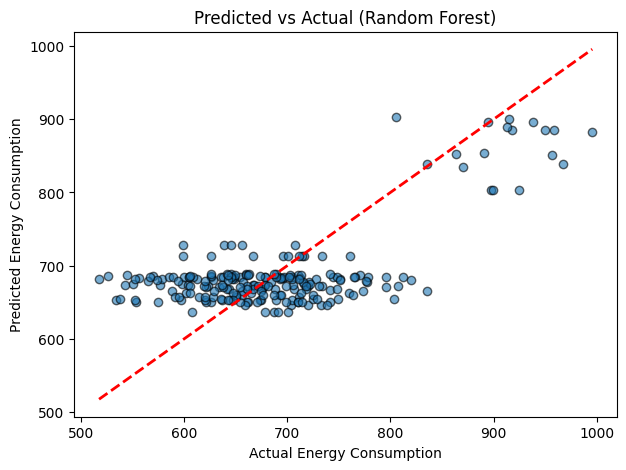

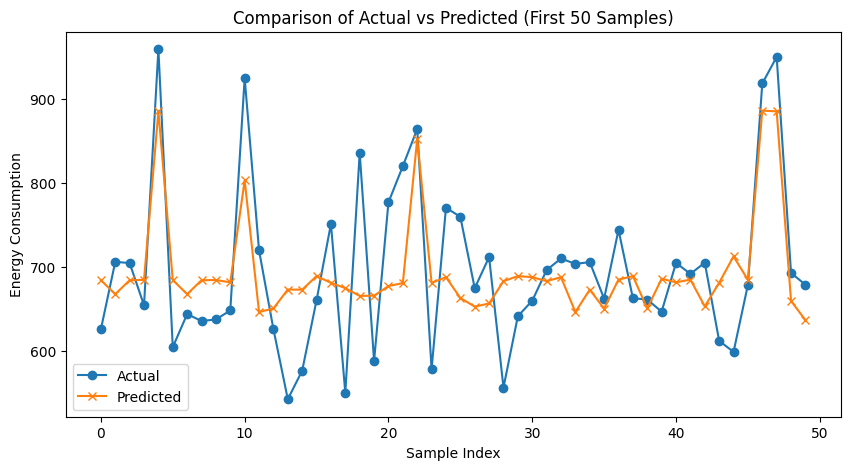

In [22]:
# =======================
# STEP 6 : Visualization of Predictions vs Actual
# =======================
import matplotlib.pyplot as plt

# Use Random Forest for visualization (better accuracy usually)
best_model = Pipeline(steps=[("preprocessor", preprocessor),
                             ("model", RandomForestRegressor(n_estimators=100, random_state=42))])

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# ---- Scatter Plot (Predicted vs Actual) ----
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors="k")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2)
plt.xlabel("Actual Energy Consumption")
plt.ylabel("Predicted Energy Consumption")
plt.title("Predicted vs Actual (Random Forest)")
plt.show()

# ---- Line Plot (first 50 values) ----
plt.figure(figsize=(10,5))
plt.plot(y_test.values[:50], label="Actual", marker="o")
plt.plot(y_pred[:50], label="Predicted", marker="x")
plt.xlabel("Sample Index")
plt.ylabel("Energy Consumption")
plt.title("Comparison of Actual vs Predicted (First 50 Samples)")
plt.legend()
plt.show()


In [23]:
# =======================
# STEP 7 : Model Deployment (Save & Load)
# =======================
import joblib

# Save the trained best model to a file
joblib.dump(best_model, "energy_consumption_model.pkl")
print("✅ Model saved as energy_consumption_model.pkl")

# ---- Later (or in another notebook/script) you can load it ----
loaded_model = joblib.load("energy_consumption_model.pkl")

# Test the loaded model with a new sample
sample_data = X_test.iloc[0:1]  # take first sample from test set
sample_pred = loaded_model.predict(sample_data)

print("🔹 Sample Input Data:")
print(sample_data)
print("\n🔹 Predicted Energy Consumption:", sample_pred[0])


✅ Model saved as energy_consumption_model.pkl
🔹 Sample Input Data:
         Date ZoneID  AvgTemperature  Humidity  SpecialEvent  Month
44 2024-02-14  Zone1       28.058678        64             0      2

🔹 Predicted Energy Consumption: 684.3455024674878
